In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\daysi\OneDrive\Desktop\Facebook_Marketing\Data\Cleaned_data.csv')

# Quick overview
print(df.shape)
print(df.columns)
print(df.head())



(1143, 15)
Index(['ad_id', 'reporting_start', 'reporting_end', 'campaign_id',
       'fb_campaign_id', 'age', 'gender', 'interest1', 'interest2',
       'interest3', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')
    ad_id reporting_start reporting_end  campaign_id  fb_campaign_id    age  \
0  708746      17/08/2017    17/08/2017        916.0        103916.0  30-34   
1  708749      17/08/2017    17/08/2017        916.0        103917.0  30-34   
2  708771      17/08/2017    17/08/2017        916.0        103920.0  30-34   
3  708815      30/08/2017    30/08/2017        916.0        103928.0  30-34   
4  708818      17/08/2017    17/08/2017        916.0        103928.0  30-34   

  gender  interest1  interest2  interest3  impressions  clicks  spent  \
0      M         15         17         17         7350       1   1.43   
1      M         16         19         21        17861       2   1.82   
2      M         20         25   

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ad_id                1143 non-null   int64         
 1   reporting_start      1143 non-null   datetime64[ns]
 2   reporting_end        1143 non-null   datetime64[ns]
 3   campaign_id          1143 non-null   float64       
 4   fb_campaign_id       1143 non-null   float64       
 5   age                  1143 non-null   object        
 6   gender               1143 non-null   object        
 7   interest1            1143 non-null   int64         
 8   interest2            1143 non-null   int64         
 9   interest3            1143 non-null   int64         
 10  impressions          1143 non-null   int64         
 11  clicks               1143 non-null   int64         
 12  spent                1143 non-null   float64       
 13  total_conversion     1143 non-nul

In [14]:
# Convert date columns
df['reporting_start'] = pd.to_datetime(df['reporting_start'])
df['reporting_end'] = pd.to_datetime(df['reporting_end'])

# Fill missing values
df.fillna(0, inplace=True)

# Create KPIs
df['CTR'] = df['clicks'] / df['impressions']
df['CPC'] = df['spent'] / df['clicks']
df['CPA'] = df['spent'] / df['approved_conversion']  # or total_conversions

# Replace infinities and NaNs with 0
df = df.replace([float('inf'), -float('inf')], 0)
df = df.fillna(0)


In [15]:
age_summary = df.groupby('age')[['spent', 'approved_conversion']].sum()
age_summary['CPA'] = age_summary['spent'] / age_summary['approved_conversion']
print(age_summary.sort_values(by='CPA'))

              spent  approved_conversion        CPA
age                                                
30-34  15252.399986                  494  30.875304
35-39  11112.429994                  207  53.683237
40-44  11589.729981                  170  68.174882
45-49  20750.669997                  208  99.762837


In [16]:
# Keep only valid gender rows
df = df[df['gender'].isin(['M', 'F'])]

# Re-run the groupby
gender_summary = df.groupby('gender')[['clicks', 'impressions']].sum()
gender_summary['CTR'] = gender_summary['clicks'] / gender_summary['impressions']
print(gender_summary)


        clicks  impressions       CTR
gender                               
F        23878    114862847  0.000208
M        14287     98571981  0.000145


In [17]:
campaign_summary = df.groupby('campaign_id')[['spent', 'approved_conversion']].sum()
campaign_summary['CPA'] = campaign_summary['spent'] / campaign_summary['approved_conversion']
campaign_summary = campaign_summary.sort_values('CPA')
print(campaign_summary.head())


                    spent  approved_conversion        CPA
campaign_id                                              
916.0          149.710001                   24   6.237917
936.0         2893.369999                  183  15.810765
1178.0       16577.159998                  378  43.854921
0.0          39084.989961                  494  79.119413


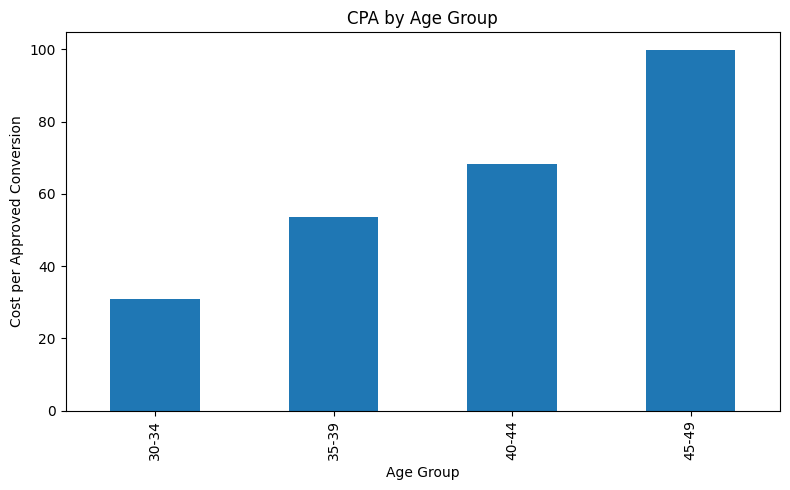

In [18]:
import matplotlib.pyplot as plt

# Filter for clean age groups
valid_ages = ['30-34', '35-39', '40-44', '45-49']
filtered_df = df[df['age'].isin(valid_ages)]

# Re-group by valid age only
age_summary = filtered_df.groupby('age')[['spent', 'approved_conversion']].sum()
age_summary['CPA'] = age_summary['spent'] / age_summary['approved_conversion']

# Plot clean CPA chart
age_summary['CPA'].plot(kind='bar', title='CPA by Age Group', ylabel='Cost per Approved Conversion', xlabel='Age Group', figsize=(8, 5))
plt.tight_layout()
plt.show()
